In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper

In [74]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Data Loading

In [75]:
#load and preprocess data 
housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0,low_memory = False)

train_raw, test_raw = helper.data_processing_wrapper(housing, 
                            num_to_cat_list = [
                                'MSSubClass',
                                'KitchenAbvGr',
                                'BedroomAbvGr',
                                'MoSold',
                                'YrSold'],
                            remove_PID = True
                            )

In [76]:
train_raw.shape

(1871, 80)

In [77]:
test_raw.shape

(624, 80)

In [78]:
set(train_raw.select_dtypes(['int64']).columns.to_list())==set(test_raw.select_dtypes(['int64']).columns.to_list())

True

In [79]:
set(train_raw.select_dtypes(['float']).columns.to_list())==set(test_raw.select_dtypes(['float']).columns.to_list())

True

In [80]:
train = train_raw.copy()
test = test_raw.copy()

train_X = train.drop(['SalePrice'],axis='columns')
train_y = train['SalePrice']
test_X = test.drop(['SalePrice'],axis='columns')
test_y = test['SalePrice']

In [81]:
cat_feats = train_X.select_dtypes(['object']).columns.to_list()
num_feats = train_X.select_dtypes(['int','float']).columns.to_list()

In [66]:
print(len(cat_feats))
print(len(num_feats))
print(train_X[cat_feats].columns)
print(train_X[num_feats].columns)

34
45
Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
       'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'GarageType', 'Fence',
       'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['GrLivArea', 'LotFrontage', 'LotArea', 'Alley', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'G

# Preprocessing

In [82]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('tf1',OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_feats)],remainder='passthrough')
     #('tf1',OneHotEncoder(sparse=False, drop='first'), cat_feats)],remainder='passthrough')
train_X_transformed = preprocessor.fit_transform(train_X)

In [69]:
#Get Transformed column names:
#raw column names (ALL) after transformation - includes one-hot encoded tf1_x_RM and numeric 
raw_columns = preprocessor.get_feature_names()
print(len(raw_columns))
#number of one-hot encoded coluns 
print(sum([i.startswith('tf1') for i in preprocessor.get_feature_names()]))

#Looking at transformed_raw_columns...
#0 to 241 are categorical columns...columns_transformed 
#241 to 286 are numeric columns... num_feats
columns_transformed = preprocessor.named_transformers_['tf1'].get_feature_names(input_features= cat_feats)
new_columns = list(columns_transformed)+num_feats
#check if the number of columns matches 
len(raw_columns) == len(new_columns)

286
241


True

In [87]:
#Create dataframe with columns labeled as FeatureCategory_Value 
train_X_transformed = pd.DataFrame(train_X_transformed,columns=new_columns)

In [88]:
train_X_transformed.head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_0,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,GrLivArea,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearB

In [14]:
test_X_transformed = preprocessor.transform(test_X)

In [15]:
test_X_transformed = pd.DataFrame(test_X_transformed,columns=new_columns)
test_X_transformed

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_0,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,GrLivArea,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearB

In [16]:
#Final steps to make data ready for model
train_y_log = np.log(train_y)
train_y_log = train_y_log.rename('LogSalePrice')
test_y_log = np.log(test_y)
test_y_log = test_y_log.rename('LogSalePrice')

In [17]:
#training= pd.concat([train_X_transformed,pd.DataFrame(train_y_log)],axis=0)

# Simple Linear Regression

In [18]:
#Simple Linear Regression: 1 Predictor, GrLivArea
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(train_X_transformed[['GrLivArea']], train_y_log)

LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error

print('R^2 is equal to %.3f' %(lm.score((train_X_transformed[['GrLivArea']]), train_y_log)))
print('RMSE is equal to %.3f' % (mean_squared_error(train_y_log, lm.predict(train_X_transformed[['GrLivArea']]), squared=False)))
print('RSS is equal to %.3f' %(np.sum((train_y_log-lm.predict(train_X_transformed[['GrLivArea']]))**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.536
RMSE is equal to 0.260
RSS is equal to 126.469
The intercept is 11.169
The slopes are [0.0005744]


# Multiple Linear Regression

In [213]:
#Multiple Linear Regression - All Variables 
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(train_X_transformed, train_y_log)


LinearRegression()

In [214]:
print('TRAIN:')
print('R^2 is equal to %.3f' %(lm.score(train_X_transformed, train_y_log)))
print('RMSE is equal to %.3f' % (mean_squared_error(train_y_log, lm.predict(train_X_transformed), squared=False)))
print('RSS is equal to %.3f' %(np.sum((train_y_log-lm.predict(train_X_transformed))**2)))
print('The intercept is %.3f' %(lm.intercept_))
#print('The slopes are %s' %(lm.coef_))

TRAIN:
R^2 is equal to 0.959
RMSE is equal to 0.078
RSS is equal to 11.271
The intercept is -141125546.463


In [216]:
print('TEST:')
print('R^2 is equal to %.3f' %(lm.score(test_X_transformed, test_y_log)))
print('RMSE is equal to %.3f' % (mean_squared_error(test_y_log, lm.predict(test_X_transformed), squared=False)))
print('RSS is equal to %.3f' %(np.sum((test_y_log-lm.predict(test_X_transformed))**2)))
print('The intercept is %.3f' %(lm.intercept_))
#print('The slopes are %s' %(lm.coef_))

TEST:
R^2 is equal to 0.907
RMSE is equal to 0.115
RSS is equal to 8.268
The intercept is -141125546.463


In [317]:
#look at coefficients
model_coef = pd.DataFrame(zip(train_X_transformed.columns,lm.coef_),
                          columns=['Feature','Coefficient']).sort_values(by='Coefficient',ascending=False)


In [318]:
model_coef 

,Feature,Coefficient
7,MSSubClass_40,1.587662e+08
12,MSSubClass_75,1.587662e+08
9,MSSubClass_50,1.587662e+08
11,MSSubClass_70,1.587662e+08
0,MSSubClass_120,1.587662e+08
5,MSSubClass_20,1.587662e+08
10,MSSubClass_60,1.587662e+08
3,MSSubClass_180,1.587662e+08
2,MSSubClass_160,1.587662e+08
14,MSSubClass_85,1.587662e+08


In [300]:
lm.coef_[0]

158766245.45025238

In [298]:
train_X_transformed.shape

(1871, 286)

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logistic.coef_))], axis = 1)


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   1.,   1.,   4.,   2.,   3.,   4.,   7.,  15.,
         10.,  25.,  29.,  49.,  75., 122., 183., 186., 238., 212., 195.,
        164., 120.,  83.,  42.,  35.,  22.,  14.,  12.,   5.,   5.,   2.,
          1.,   0.,   0.,   1.,   0.,   1.]),
 array([-0.61017275, -0.59042873, -0.57068472, -0.55094071, -0.53119669,
        -0.51145268, -0.49170867, -0.47196465, -0.45222064, -0.43247663,
        -0.41273261, -0.3929886 , -0.37324459, -0.35350057, -0.33375656,
        -0.31401255, -0.29426853, -0.27452452, -0.25478051, -0.23503649,
        -0.21529248, -0.19554847, -0.17580445, -0.15606044, -0.13631643,
        -0.11657242, -0.0968284 , -0.07708439, -0.05734038, -0.03759636,
        -0.01785235,  0.00189166,  0.02163568,  0.04137969,  0.0611237 ,
         0.08086772,  0.10061173,  0.12035574,  0.14009976,  0.15984377,
         0.17958778,  0.1993318 ,  0.21907581,  0.23881982,  0.25856384,
 

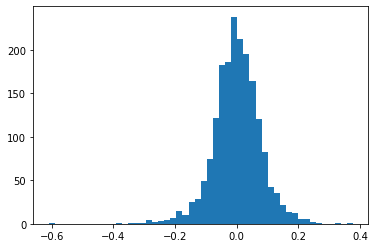

In [217]:
residuals = train_y_log - lm.predict(train_X_transformed)
plt.hist(residuals,bins=50)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          4.,   0.,   1.,   6.,   6.,  24.,  43.,  79., 129., 125., 102.,
         56.,  22.,  16.,   3.,   4.,   2.]),
 array([-1.71178657, -1.67123381, -1.63068104, -1.59012827, -1.5495755 ,
        -1.50902273, -1.46846997, -1.4279172 , -1.38736443, -1.34681166,
        -1.30625889, -1.26570613, -1.22515336, -1.18460059, -1.14404782,
        -1.10349505, -1.06294229, -1.02238952, -0.98183675, -0.94128398,
        -0.90073121, -0.86017845, -0.81962568, -0.77907291, -0.73852014,
        -0.69796737, -0.65741461, -0.61686184, -0.57630907, -0.5357563 ,
        -0.49520353, -0.45465077, -0.414098  , -0.37354523, -0.33299246,
        -0.29243969, -0.25188693, -0.21133416, -0.17078139, -0.13022862,
        -0.08967585, -0.04912309, -0.00857032,  0.03198245,  0.07253522,
 

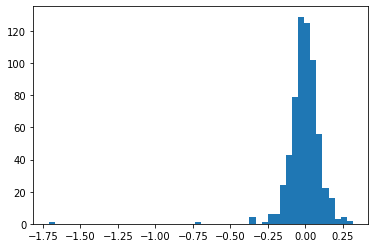

In [218]:
residuals = test_y_log - lm.predict(test_X_transformed)
plt.hist(residuals,bins=50)

In [219]:
import statsmodels.api as sm
x = sm.add_constant(train_X_transformed)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(train_y_log, train_X_transformed)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     152.4
Date:                Fri, 03 Sep 2021   Prob (F-statistic):               0.00
Time:                        19:18:21   Log-Likelihood:                 2127.5
No. Observations:                1871   AIC:                            -3759.
Df Residuals:                    1623   BIC:                            -2387.
Df Model:                         247                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass_120            0.07

In [220]:
pValues = results.pvalues

In [221]:
#Significant features 
pValues.sort_values(ascending=True)[:25]

OverallQual              3.639656e-46
OverallCond              3.331910e-41
GrLivArea                1.621471e-31
Functional_Typ           5.279769e-29
LotConfig_Inside         5.548381e-17
LotConfig_CulDSac        8.512447e-17
CentralAir_Y             1.041769e-16
Neighborhood_GrnHill     1.890845e-16
YrSold_2010              2.525175e-16
YrSold_2006              2.590029e-16
Utilities_AllPub         3.870529e-16
Street_Pave              4.904652e-16
LotConfig_Corner         9.332551e-16
Fence_None               1.205585e-15
YrSold_2008              1.385274e-15
CentralAir_N             5.269359e-15
LotShape_IR2             5.742174e-15
MasVnrType_Stone         5.827060e-15
SaleCondition_Partial    6.128179e-15
LotShape_Reg             6.418048e-15
LandContour_HLS          7.013436e-15
Fence_MnPrv              7.234957e-15
LotShape_IR1             1.024791e-14
MasVnrType_BrkFace       1.045440e-14
LandSlope_Mod            1.474479e-14
dtype: float64

In [37]:
# import statsmodels.api as sm
# x = sm.add_constant(test_X_transformed)
# # Notice that the dependent variable (y) comes before the independent variables (x)
# # Use df.columns.values to get all the column names
# model = sm.OLS(test_y_log, test_X_transformed)
# results = model.fit()
# #print(results.summary())

In [38]:
#Significant features 
pValues = results.pvalues
pValues.sort_values(ascending=True)[:25]

Condition2_Norm         4.509650e-12
Functional_Typ          8.234724e-11
Foundation_BrkTil       1.950628e-10
OverallQual             3.171493e-10
OverallCond             1.302833e-09
LandContour_HLS         2.056630e-09
Foundation_CBlock       2.239798e-09
Foundation_PConc        3.224031e-09
CentralAir_Y            3.683900e-09
Fence_GdPrv             7.081079e-09
LandContour_Lvl         8.690335e-09
SaleCondition_Normal    1.488720e-08
YrSold_2006             1.495149e-08
LotShape_Reg            2.367264e-08
YrSold_2010             3.839593e-08
MoSold_7                4.103739e-08
Fence_GdWo              6.438854e-08
Street_Pave             6.946593e-08
MSZoning_RL             7.277537e-08
LotShape_IR1            7.974076e-08
YrSold_2009             9.118606e-08
Neighborhood_Somerst    1.182248e-07
KitchenAbvGr_2          1.275757e-07
Functional_Min2         1.286149e-07
BsmtFinType2_Unf        1.767676e-07
dtype: float64

# Penalized Linear Regression (LASSO) 

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lasso  = Lasso()
alphas = np.linspace(0.1,5,100)
lasso.set_params(normalize=False)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(train_X_transformed, train_y_log)  
        coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = train_X_transformed.columns)  
coefs_lasso.head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_0,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,GrLivArea,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearB

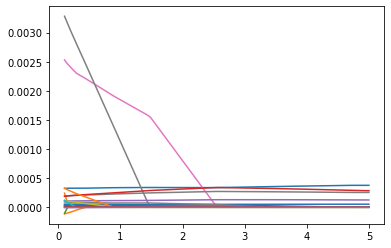

In [323]:
for name in coefs_lasso.columns[241:]:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
# plt.xlabel(r'hyperparameter $\lambda$')
# plt.ylabel(r'slope values')
# plt.legend(loc=1) 

# Random Forest


### Arguments

Since random forest is combined by decision trees, it also has the arguments of tree: 

- **criterion** : default=”gini”.
- **max_depth**: default = None.
- **min_samples_split**: default = 2.
- **min_samples_leaf**: default = 1.
- **n_estimators**: The number of trees. default=100.
- **bootstrap**: Whether bootstrap samples are used when building trees. default=true.
- **oob_score**: Whether to use out-of-bag samples to estimate the generalization error. default=false.

### Methods

- **fit**: Build a forest of trees from the training set (X, y).
- **score**: Return the mean accuracy on the given test data and labels.
- **predict**: Predict class for X.
- **predict_log_proba**: Predict class log-probabilities for X.
- **predict_proba**: Predict class probabilities for X.
- **set_params**: Set the parameters of this estimator.
- **get_params**: Get parameters for this estimator.

### Attributes

- **feature\_importances\_**:The feature importances (the higher, the more important the feature).

- **oob\_score\_**: Score of the training dataset obtained using an out-of-bag estimate.

In [160]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor(random_state=0)

In [97]:
randomForest.fit(train_X_transformed,train_y_log)

RandomForestRegressor(random_state=0)

In [98]:
randomForest.score(train_X_transformed,train_y_log) 

0.9866946086219645

In [101]:
randomForest.score(test_X_transformed,test_y_log) 

0.8858363677975818

In [148]:
print("The training error of random forest is: %.5f" %(1 - randomForest.score(train_X_transformed, train_y_log)))
print("The test     error of random forest is: %.5f" %(1 - randomForest.score(test_X_transformed, test_y_log)))

The training error of random forest is: 0.01331
The test     error of random forest is: 0.11416


In [166]:
#Scaling does not make a difference here 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X = scaler.fit_transform(train_X_transformed)

In [167]:
randomForest.fit(X,train_y_log)
randomForest.score(X,train_y_log) 

0.9866858676812434

In [168]:
X_test = scaler.transform(test_X_transformed)

In [169]:
randomForest.score(X_test,test_y_log) 

0.8855165162225123

In [171]:
train_X_transformed.shape

(1871, 286)

In [172]:
286**.5

16.911534525287763

In [ ]:
RandomForestRegressor()

In [170]:
#Random Search 

In [181]:
range(10,111,10)

range(10, 111, 10)

In [174]:
[int(x) for x in np.linspace(10, 110, num = 11)]

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

In [183]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [100,200,400,600,1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt',10,50,100,150]
# Maximum number of levels in tree
max_depth = list(range(10,111,10))
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [184]:
random_grid

{'n_estimators': [100, 200, 400, 600, 1000],
 'max_features': ['auto', 'sqrt', 10, 50, 100, 150],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4, 10],
 'bootstrap': [True, False]}

In [185]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3,
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X_transformed, train_y_log)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 10, 50,
                                                         100, 150],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 400, 600,
                                                         1000]},
                   random_state=42, verbose=2)

In [194]:
# {'n_estimators': 400,
#  'min_samples_split': 5,
#  'min_samples_leaf': 1,
#  'max_features': 100,
#  'max_depth': 40,
#  'bootstrap': False}

In [186]:
rf_random.best_params_


{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 100,
 'max_depth': 40,
 'bootstrap': False}

In [208]:
rf_random.best_score_

0.9144331713356495

In [189]:
best_rf = rf_random.best_estimator_

In [191]:
best_rf.fit(train_X_transformed,train_y_log)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features=100,
                      min_samples_split=5, n_estimators=400)

In [207]:
print("Training R2 Value: %.5f" %(best_rf.score(train_X_transformed,train_y_log)))
print("Test R2 Value: %.5f" %(best_rf.score(test_X_transformed,test_y_log)))


Training R2 Value: 0.99914
Test R2 Value: 0.90229


In [200]:
print("The training error of random forest is: %.5f" %(1 - best_rf.score(train_X_transformed, train_y_log)))
print("The test     error of random forest is: %.5f" %(1 - best_rf.score(test_X_transformed, test_y_log)))

The training error of random forest is: 0.00086
The test     error of random forest is: 0.09771


In [205]:
importances = pd.Series(
    rf_random.best_estimator_.feature_importances_,
    index = train_X_transformed.columns
).sort_values(ascending=False)
importances[:25]

OverallQual     0.269314
GrLivArea       0.131259
ExterQual       0.091933
YearBuilt       0.072054
TotalBsmtSF     0.045253
1stFlrSF        0.043480
GarageArea      0.042444
GarageCars      0.041414
KitchenQual     0.027252
GarageYrBlt     0.021472
BsmtQual        0.017248
LotArea         0.015046
FireplaceQu     0.014461
BsmtFinSF1      0.013918
Fireplaces      0.010837
2ndFlrSF        0.010724
YearRemodAdd    0.008222
FullBath        0.007734
OverallCond     0.007458
MasVnrArea      0.006022
LotFrontage     0.005518
CentralAir_N    0.004957
CentralAir_Y    0.004943
BsmtUnfSF       0.004221
TotRmsAbvGrd    0.004120
dtype: float64

In [ ]:
# {'n_estimators': 400,
#  'min_samples_split': 5,
#  'min_samples_leaf': 1,
#  'max_features': 100,
#  'max_depth': 40,
#  'bootstrap': False}

In [224]:
random_grid2 = {'n_estimators': [400],
 'max_features': [100],
 'max_depth': [40, None],
 'min_samples_split': [5],
 'min_samples_leaf': [1,10,20,30],
 'bootstrap': [True, False]}

In [227]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random2 = RandomizedSearchCV(estimator = rf2, 
                               param_distributions = random_grid2, 
                               n_iter = 100, 
                               cv = 3,
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random2.fit(train_X_transformed, train_y_log)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/Users/nikiagrawal/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [40, None],
                                        'max_features': [100],
                                        'min_samples_leaf': [1, 10, 20, 30],
                                        'min_samples_split': [5],
                                        'n_estimators': [400]},
                   random_state=42, verbose=2)

In [319]:
rf_random2.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 100,
 'max_depth': 40,
 'bootstrap': False}

In [320]:
best_rf = rf_random2.best_estimator_

In [322]:
print('Cross Val score: ', cross_val_score(best_rf, train_X_transformed, train_y_log, cv=3))
print('Cross Val score mean: ', cross_val_score(best_rf, train_X_transformed, train_y_log, cv=3).mean())
print('Train score: ',best_rf.score(train_X_transformed,train_y_log))
print('Test score: ',best_rf.score(test_X_transformed,test_y_log))

Cross Val score:  [0.92265889 0.91380004 0.9067264 ]
Cross Val score mean:  0.913458254607102
Train score:  0.999108670432328
Test score:  0.9020879975882954


In [236]:
rf_random2.best_score_

0.914082970486509

In [235]:
rf_random2.score(train_X_transformed, train_y_log)

0.999108670432328

In [238]:
rf_random2.score(test_X_transformed, test_y_log)

0.9020879975882954

In [247]:
rf2 = RandomForestRegressor(n_estimators=400, min_samples_leaf = 1,min_samples_split=5,
                            max_features=100,bootstrap=False)

In [248]:
rf2.fit(train_X_transformed, train_y_log)

RandomForestRegressor(bootstrap=False, max_features=100, min_samples_split=5,
                      n_estimators=400)

In [249]:
rf2.score(train_X_transformed, train_y_log)

0.9991537321101562

In [250]:
rf2.score(test_X_transformed, test_y_log)

0.9018080142382091

In [253]:
from sklearn.model_selection import cross_val_score
print((cross_val_score(rf2, train_X_transformed, train_y_log, cv=3)).mean())


0.9137922663770349


In [274]:
rf3 = RandomForestRegressor(n_estimators= 400,
 min_samples_split= 5,
 min_samples_leaf=1,
 max_features='auto',
 max_depth= None,
 bootstrap=True)

In [275]:
rf3.fit(train_X_transformed.loc[:,num_feats], train_y_log)

RandomForestRegressor(min_samples_split=5, n_estimators=400)

In [277]:
rf3.score(train_X_transformed.loc[:,num_feats], train_y_log)

0.98346778438815

In [278]:
rf3.score(test_X_transformed.loc[:,num_feats], test_y_log)

0.8868338561022672

In [279]:
print((cross_val_score(rf3, train_X_transformed.loc[:,num_feats], train_y_log, cv=3)).mean())


0.9016812655287758


In [292]:
train_X_transformed.loc[:,new_columns[:241]]

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_0,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0

In [293]:
rf3.fit(train_X_transformed.loc[:,new_columns[:241]], train_y_log)

RandomForestRegressor(min_samples_split=5, n_estimators=400)

In [294]:
rf3.score(train_X_transformed.loc[:,new_columns[:241]], train_y_log)

0.9510393415039025

In [295]:
rf3.score(test_X_transformed.loc[:,new_columns[:241]], test_y_log)

0.732685542280362